In [1]:
import matplotlib.pyplot as plt
import statistics
import math
import random

In [2]:
%matplotlib inline

In [113]:
def coin_flip():
    coin = random.randint(0,1)
    if coin == 1:
        return True
    return False

def get_ratio(list_tup):
    return [x/(x+y) for x,y in list_tup]

def get_total(list_tup):
    return [x+y for x,y in list_tup]

In [149]:
def n_flips(n=2**16):
    head_flips = 0
    tail_flips = 0
    checkpoint = []
    for flip in range(n):
        if coin_flip():
            head_flips += 1
        else:
            tail_flips += 1
        if math.log2(flip+1) % 1 == 0:
            checkpoint.append((head_flips, tail_flips))
    if sum(checkpoint[len(checkpoint)-1]) != head_flips + tail_flips:
        checkpoint.append((head_flips,tail_flips))
    
    return checkpoint
flip_data = n_flips()

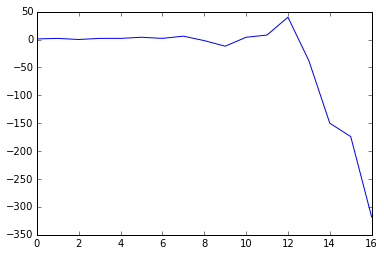

In [119]:
plt.plot([x-y for x,y in flip_data])

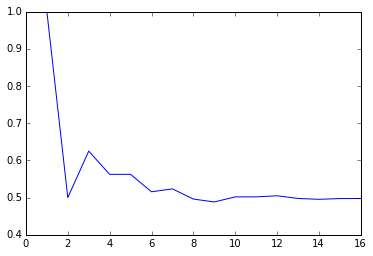

In [120]:
plt.plot(get_ratio(flip_data))

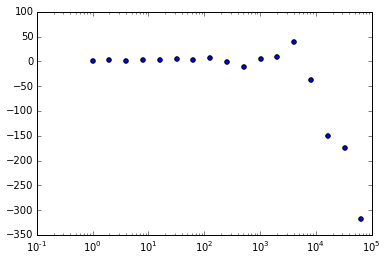

In [117]:
plt.scatter(get_total(flip_data),[x-y for x,y in flip_data])
plt.xscale('log')
plt.show()

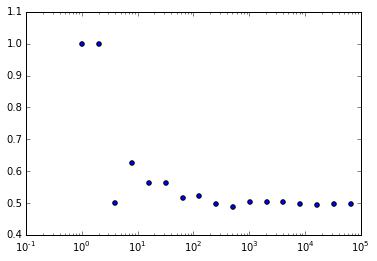

In [115]:
plt.scatter(get_total(flip_data),[x/(x+y) for x,y in flip_data])
plt.xscale('log')
plt.show()

In [103]:
def n_flips_20():
    return [n_flips() for x in range(20)]

In [125]:
twenty = n_flips_20()

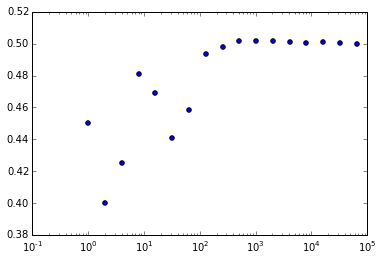

In [126]:
twenty_ratio = [get_ratio(n) for n in twenty]
unpacked_twenty = [statistics.mean(x) for x in list(zip(*twenty_ratio))]
plt.scatter(get_total(flip_data),unpacked_twenty)
plt.xscale('log')

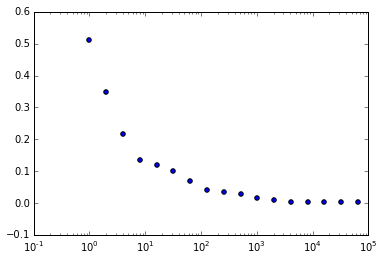

In [141]:
sd_twenty = [statistics.stdev(x) for x in list(zip(*twenty_ratio))]
plt.scatter(get_total(flip_data),sd_twenty)
plt.xscale('log')


In [143]:
def flip_100k_100():
    return [n_flips(100) for x in range(100000)]

In [152]:
hundred_k_data = flip_100k_100()